In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users\AZADC\Downloads\BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

### Analyzing the columns

In [8]:
df['User_ID'].nunique()

5891

In [9]:
df['Product_ID'].nunique()

3623

In [10]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [13]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [16]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [17]:
df['Purchase'].sum()

5017668378

In [18]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [19]:
for column in df.columns:
    print(df[column].nunique(), '\t:', column)
    

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


### Analysing Gender

<Axes: title={'center': 'Gender Ratio'}>

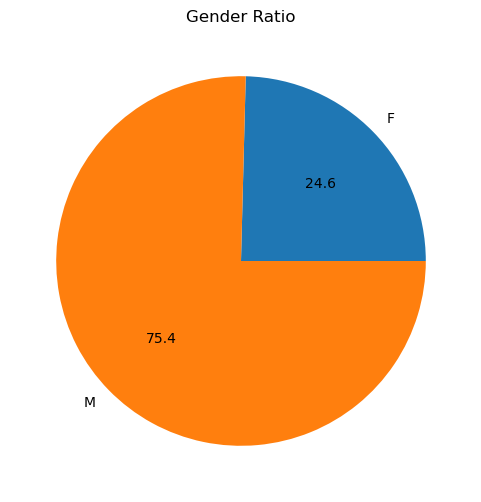

In [20]:
df.groupby('Gender').size().plot(kind= 'pie', autopct ='%.1f', title='Gender Ratio', figsize = (6,6))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

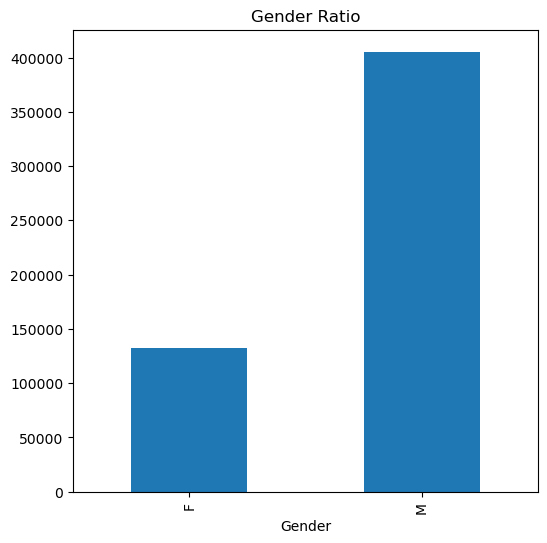

In [21]:
df.groupby('Gender').size().plot(kind= 'bar', title='Gender Ratio', figsize = (6,6))

In [22]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

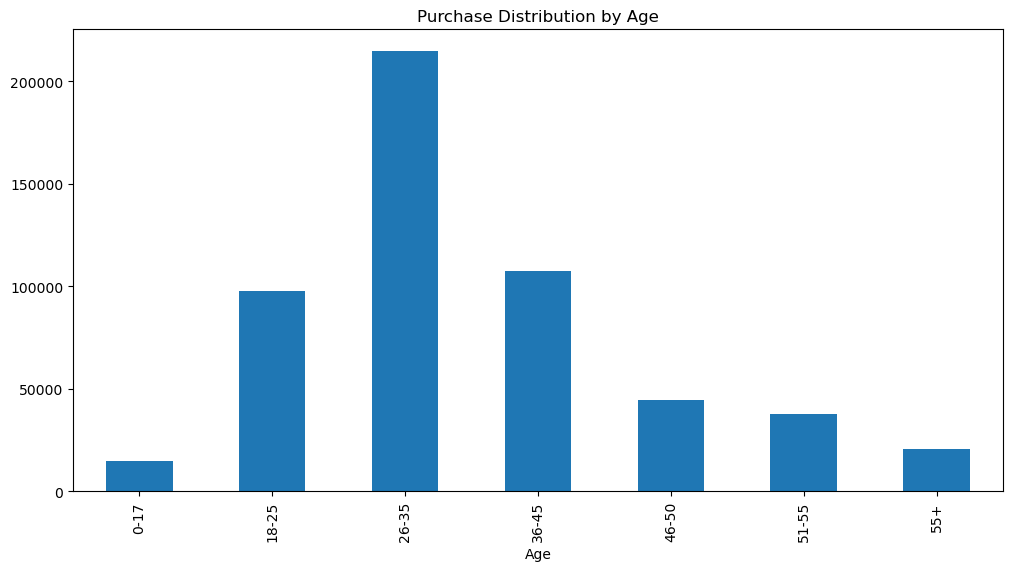

In [24]:
df.groupby('Age').size().plot(kind='bar', figsize=(12,6), title='Purchase Distribution by Age')

In [27]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] ==i]['Product_ID'].nunique()])

data= pd.DataFrame(lst, columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: title={'center': 'Amount spent by different Age group'}, xlabel='Age'>

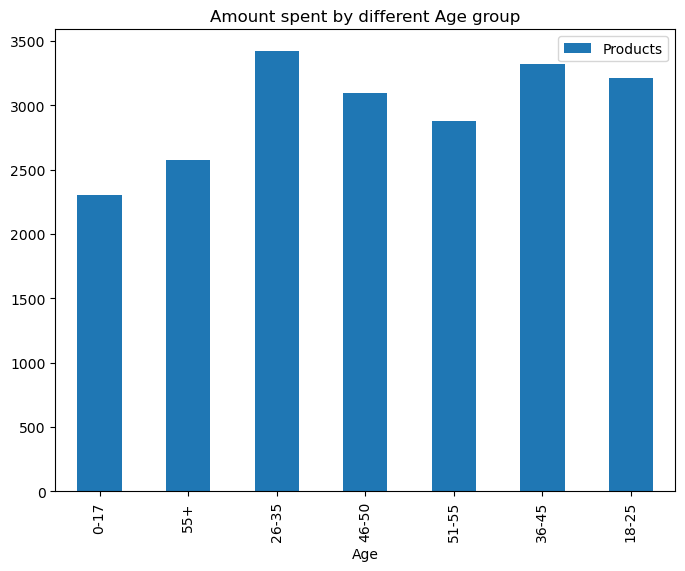

In [31]:
data.plot(kind='bar', x='Age',figsize=(8,6), title='Amount spent by different Age group')

In [36]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

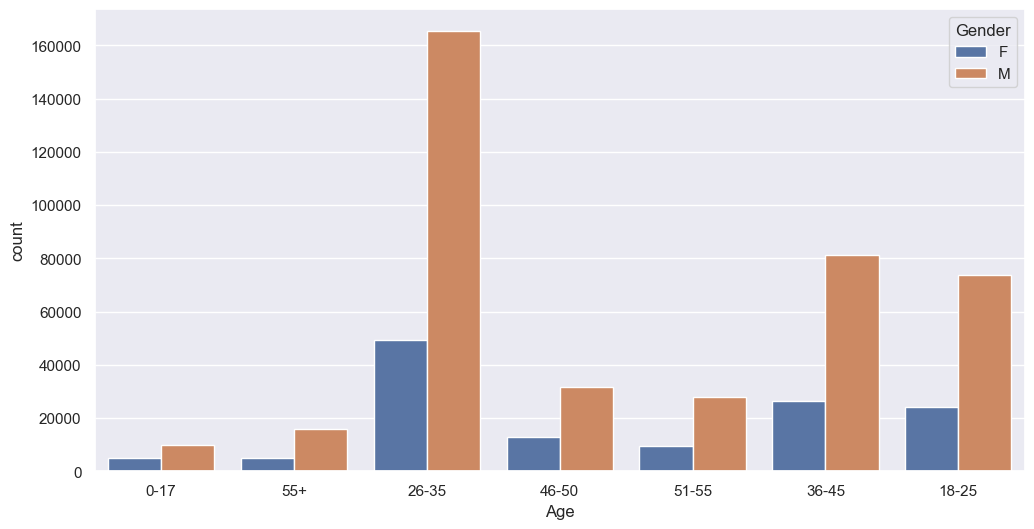

In [39]:
sns.set(rc= {'figure.figsize':(12,6)})
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

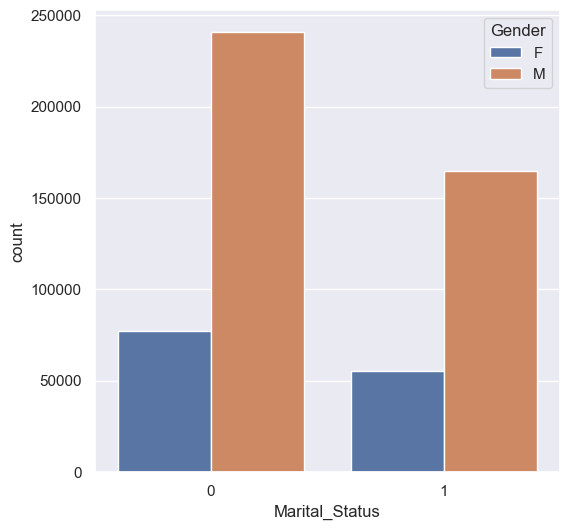

In [40]:
sns.set(rc= {'figure.figsize':(6,6)})
sns.countplot(x='Marital_Status', hue='Gender', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

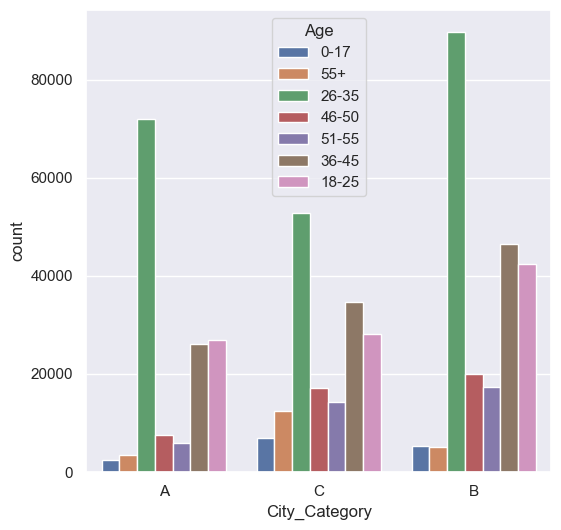

In [45]:
sns.countplot(x='City_Category', hue='Age', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

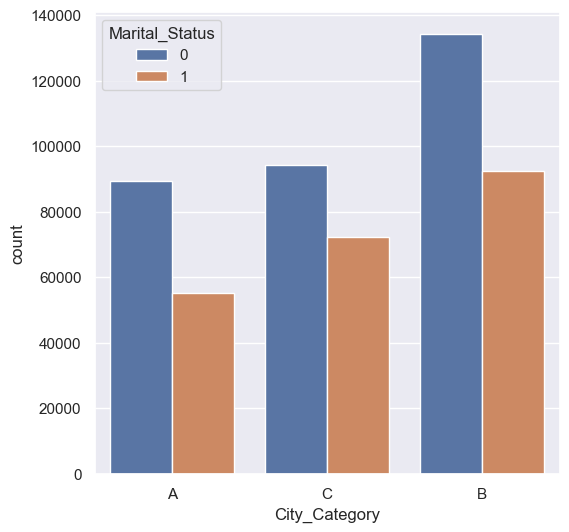

In [46]:
sns.countplot(x='City_Category',hue='Marital_Status', data=df)

<Axes: >

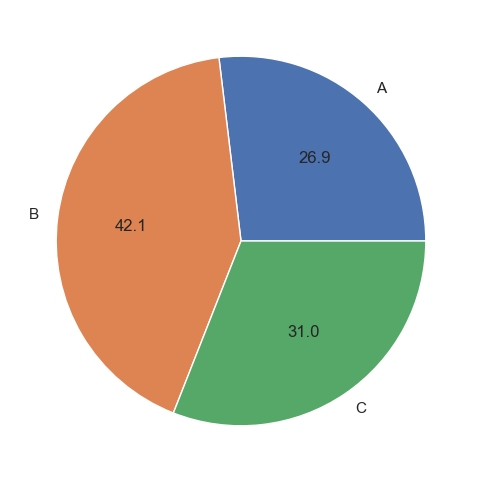

In [42]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct ='%0.1f')

### Occupation and Products Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

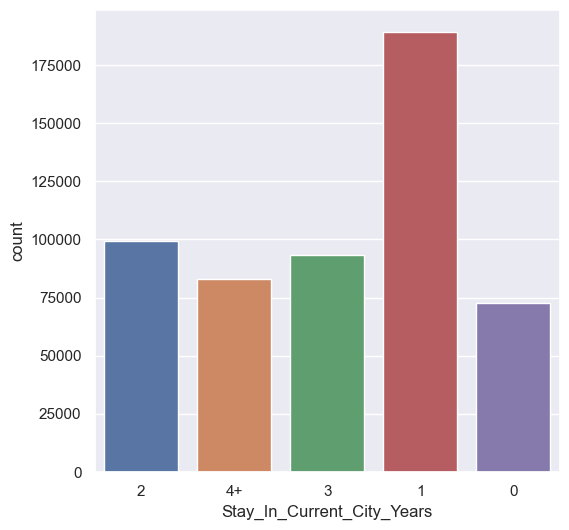

In [47]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: >

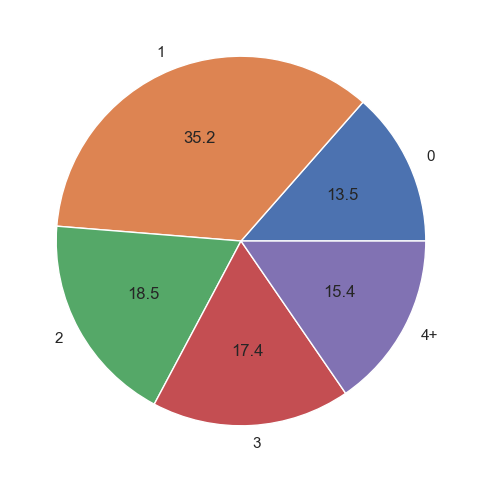

In [52]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%0.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

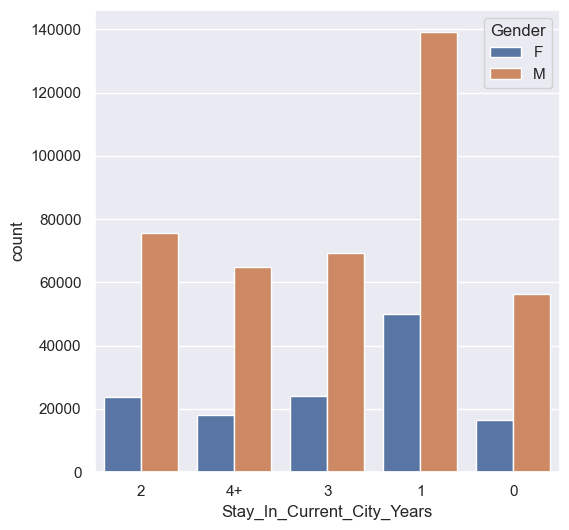

In [48]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue= df['Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

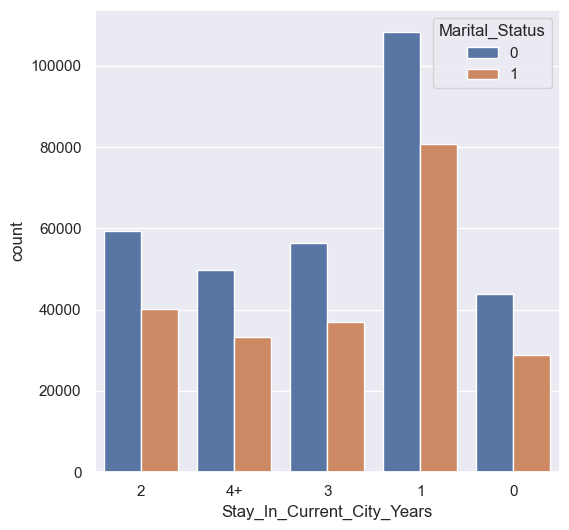

In [50]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['Marital_Status'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

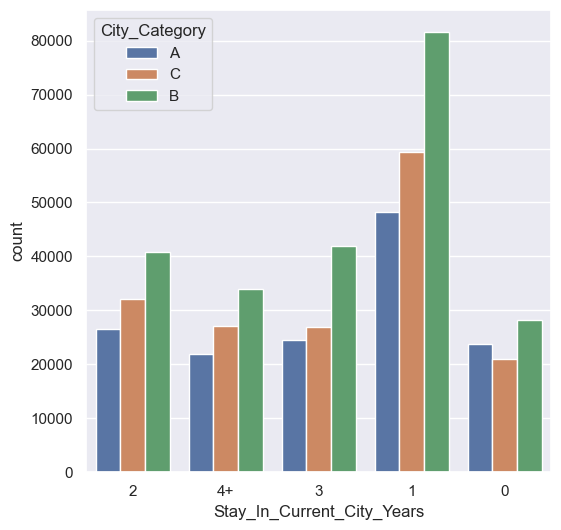

In [51]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['City_Category'])

<Axes: xlabel='Stay_In_Current_City_Years'>

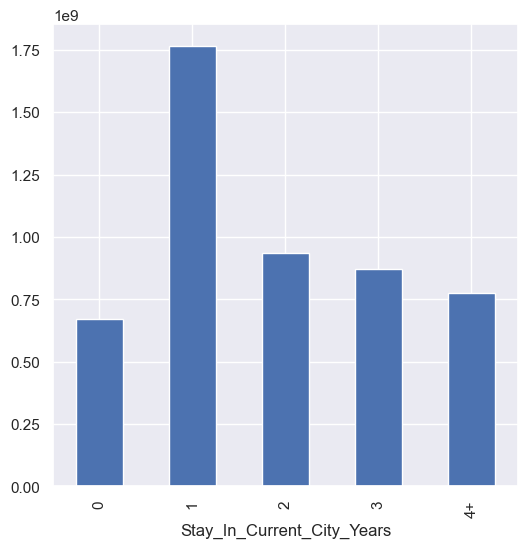

In [54]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

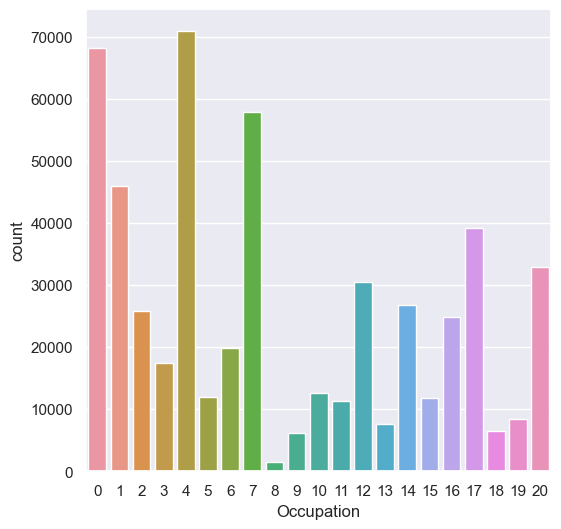

In [55]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

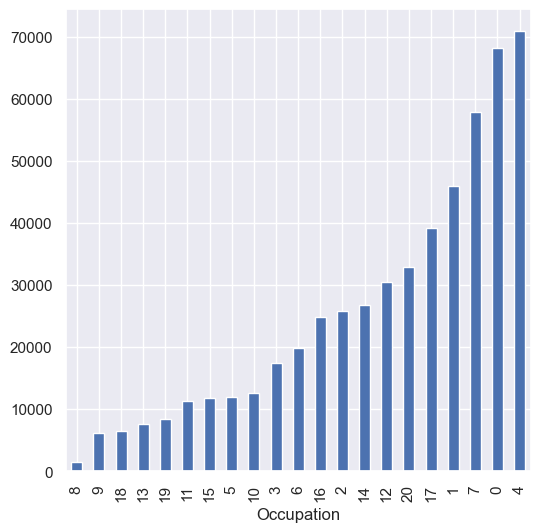

In [57]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

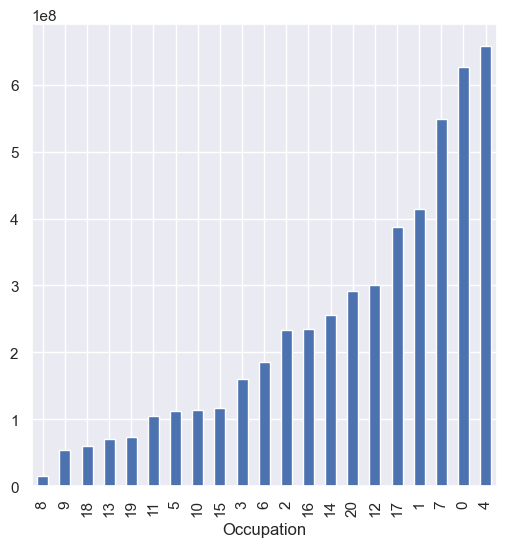

In [58]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

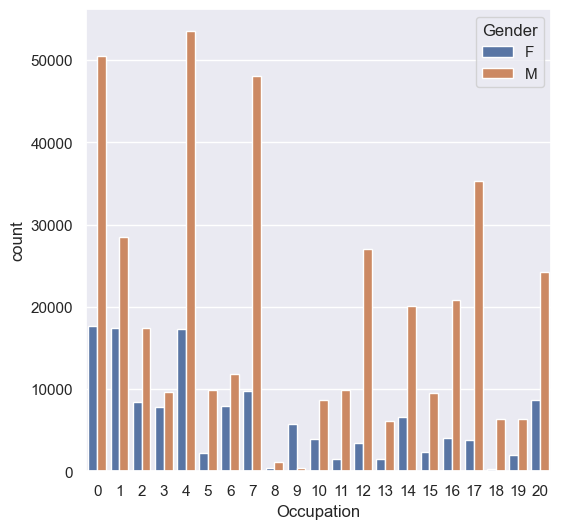

In [61]:
sns.countplot(x=df['Occupation'],hue=df['Gender'])

<Axes: xlabel='Occupation', ylabel='count'>

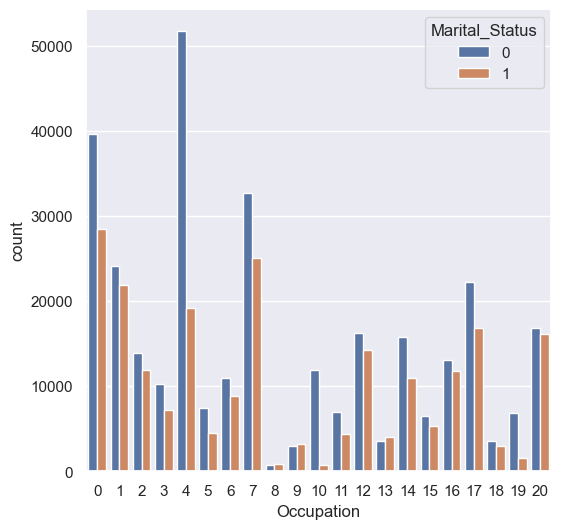

In [62]:
sns.countplot(x=df['Occupation'],hue=df['Marital_Status'])

<Axes: xlabel='Occupation'>

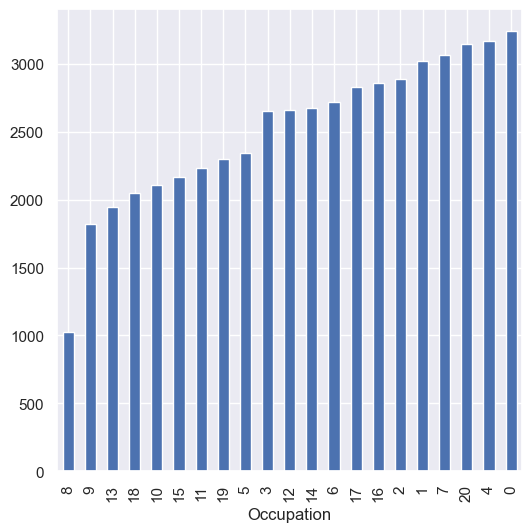

In [68]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

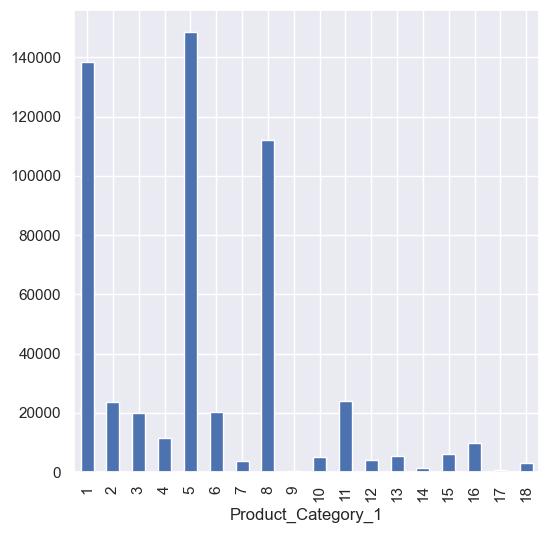

In [69]:
df.groupby('Product_Category_1').size().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

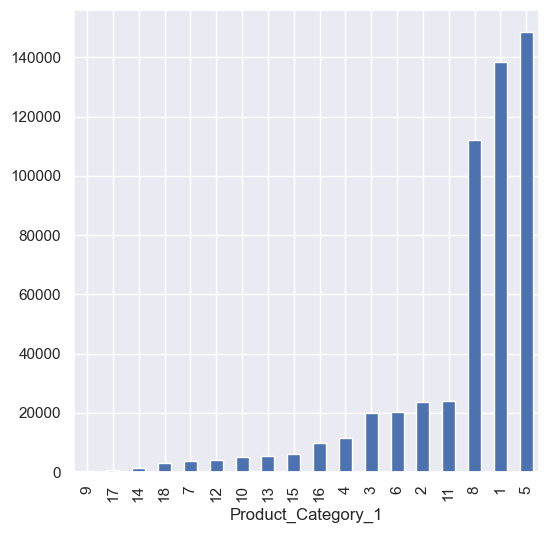

In [70]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

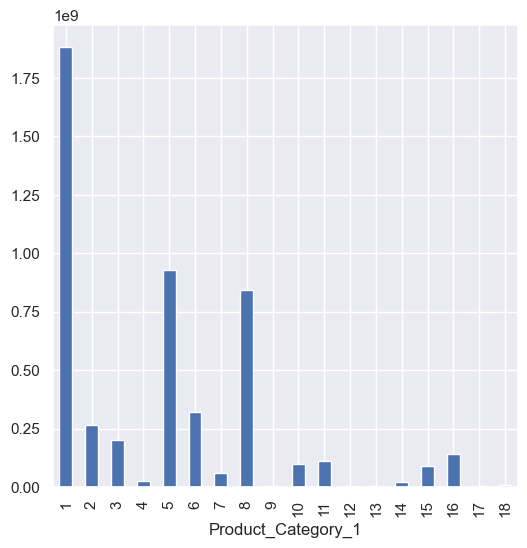

In [72]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar')

<Axes: xlabel='Product_ID'>

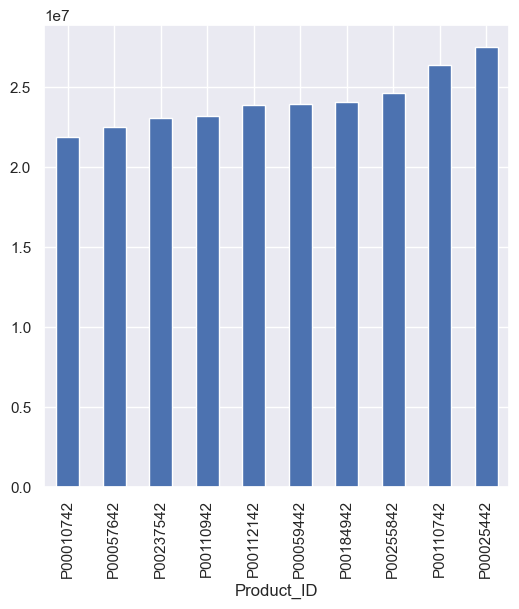

In [73]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind ='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

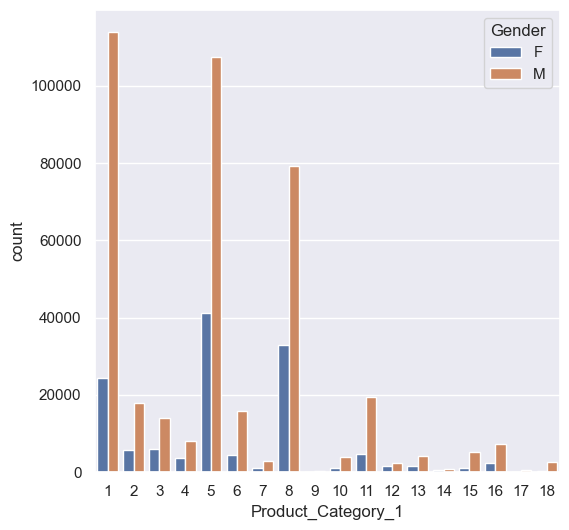

In [76]:
sns.countplot(x=df['Product_Category_1'],hue=df['Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

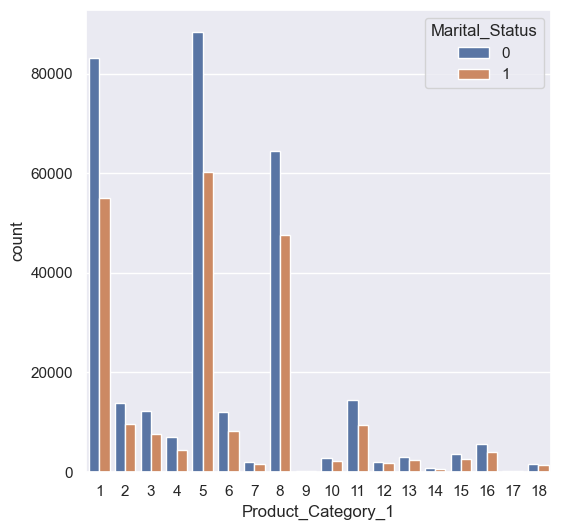

In [77]:
sns.countplot(x=df['Product_Category_1'],hue=df['Marital_Status'])

### Gender and Marital Status Analysis

In [82]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))
df['MaritalGender'] =l

In [83]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,F_0,3,8370,F_F_0
1,1000001,P00248942,F,0-17,10,A,2,F_0,1,15200,F_F_0
2,1000001,P00087842,F,0-17,10,A,2,F_0,12,1422,F_F_0
3,1000001,P00085442,F,0-17,10,A,2,F_0,12,1057,F_F_0
4,1000002,P00285442,M,55+,16,C,4+,M_0,8,7969,M_M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

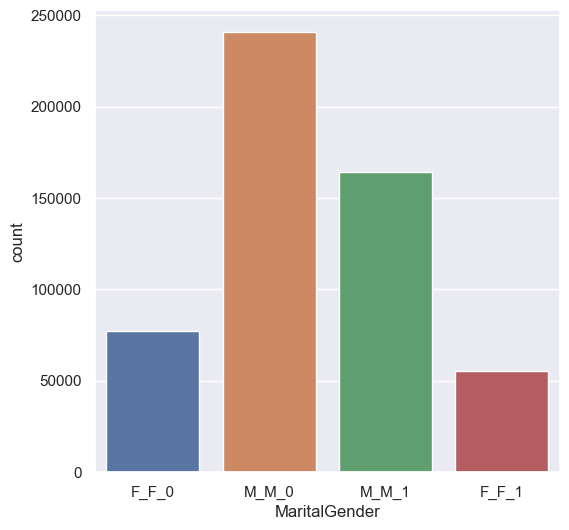

In [84]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

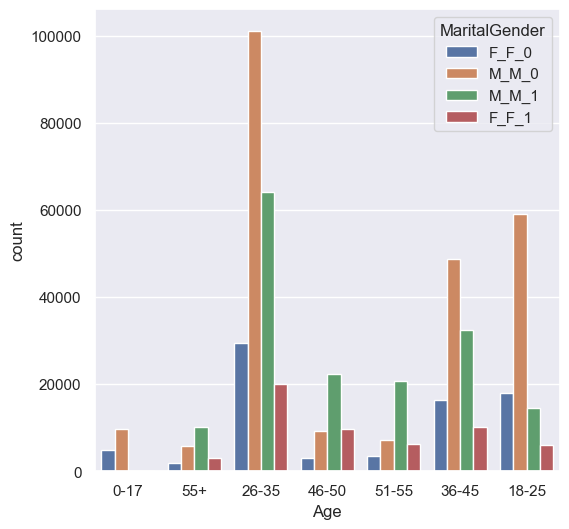

In [85]:
sns.countplot(x=df['Age'], hue=df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

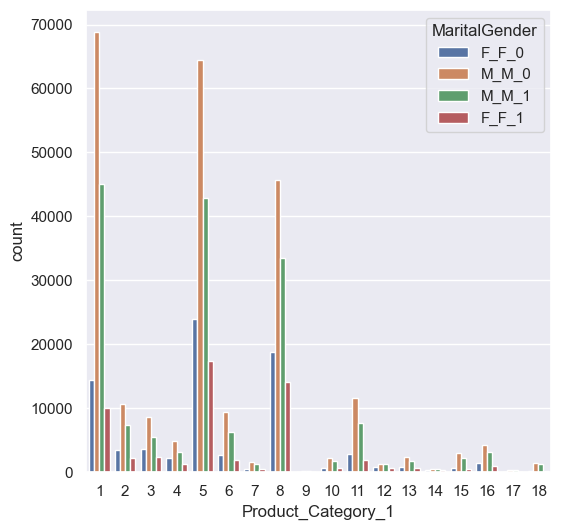

In [86]:
sns.countplot(x=df['Product_Category_1'],hue=df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

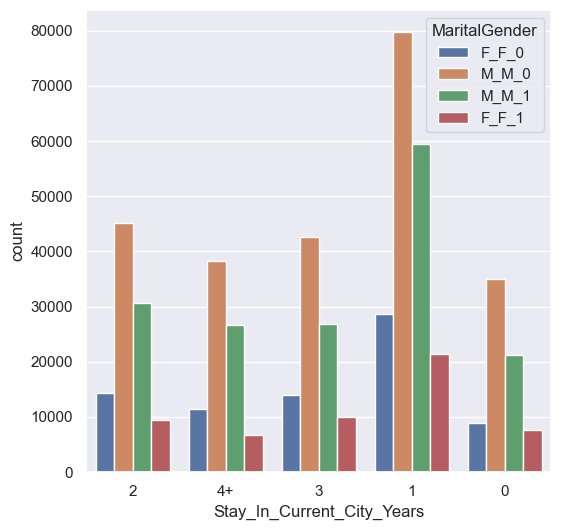

In [87]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['MaritalGender'])